In [5]:
import numpy as np

#fake income/age clusters for N people in k clusters
def createClusteredData(N, k):
    pointsPerCluster = float(N)/k
    X = []
    y = []
    for i in range (k):
        incomeCentroid = np.random.uniform(20000.0, 200000.0)
        ageCentroid = np.random.uniform(20.0, 70.0)
        for j in range(int(pointsPerCluster)):
            X.append([np.random.normal(incomeCentroid, 10000.0), np.random.normal(ageCentroid, 2.0)])
            y.append(i)
    X = np.array(X)
    y = np.array(y)
    return X, y

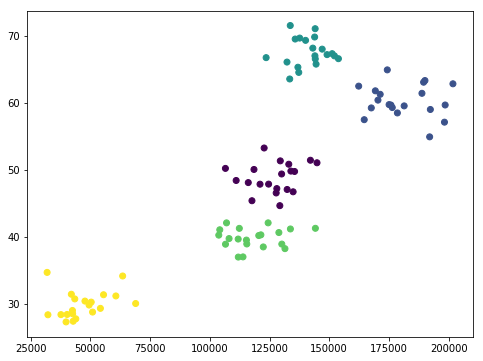

In [12]:
%matplotlib inline
from pylab import *

(X, y) = createClusteredData(100, 5)
plt.figure(figsize = (8 , 6))
plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
plt.show()

In [41]:
from sklearn import svm,datasets

c = 1
svc = svm.SVC(kernel = 'linear', C=c, gamma = 10).fit(X, y)


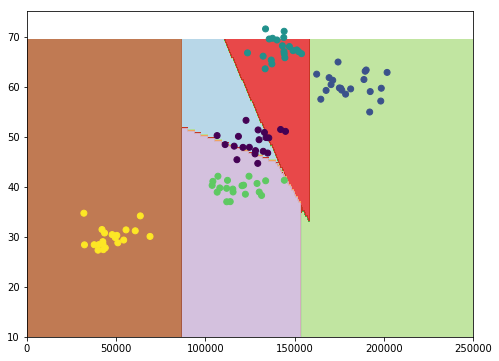

In [42]:
def plotPredictions(clf):
    xx, yy = np.meshgrid(np.arange(0, 250000, 10),
                     np.arange(10, 70, 0.5))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    plt.figure(figsize=(8, 6))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
    plt.show()
    
plotPredictions(svc)

In [25]:
# just to predict for a given data point
# o/p is the cluster no to which a given feature array( or given data point belong)  
print(svc.predict([[200000, 50]]))

[1]


In [26]:
print(svc.predict([[50000 , 40]]))

[4]


In [44]:
# Accuracy of the model
svc.score(X , y)

0.94